# Quick start

To test the functionality of pywebplotdigitizer we use a figure from the article in the citation below. Figure 1 reports the results of a rheology flow curve measuremnt for a concentrated oil in water emulsion with two different concentration of oil. 

The data where digitized using the online [webplotdigitizer](https://automeris.io/WebPlotDigitizer/) and include two Datasets for rhe main axes, the stress vs. shear rate results, and 2 datasets for each of the additional 5 axes for the flow velocimetry at different shear rates.

## figure 1 from article

Caggioni, M., Trappe, V., & Spicer, P. T. (2020). Variations of the Herschel–Bulkley exponent reflecting contributions of the viscous continuous phase to the shear rate-dependent stress of soft glassy materials. Journal of Rheology, 64(2), 413-422. [link to Article](https://pubs.aip.org/sor/jor/article/64/2/413/241704/Variations-of-the-Herschel-Bulkley-exponent), [link to figure](https://pubs.aip.org/view-large/figure/65552470/413_1_f1.jpg)

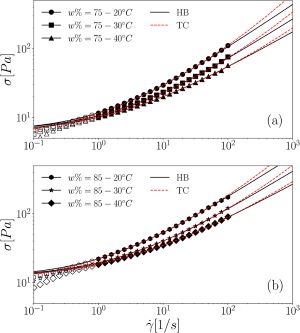

**Figure caption**: (a) Flow curves obtained for the 75 wt. % oil emulsions produced with the 6 Pa s oil. The measurements are performed at 20 (circles), 30 (squares), and 40 °C (triangle). Solid black lines denote the best fits to the HB model; the dashed red lines correspond to the best fits to the TC model. The fitted data range is here restricted to γ˙>1/s
⁠, excluding the data indicated by open symbols for which slip becomes important. (b) Same as (a) for the 85 wt. % oil emulsion.


## Result of the digitization work is stored in the WebPlotDigitizer file format

**TC_figure1.tar** was saved and has the following structure:

* **info.json** - a dictionary specifying:
    * "version" : [4,0] for now we are aware of only this version 
    * "json" " str the name of the json file storing the data in the tar file
    * "images" : [str] the name of the image file from which the data were digitized (we assume this list will have only one element, we don't see for now the case where there can be more than one image)

* **wdp.json** - file with digitized data, the schema description at https://github.com/ankitrohatgi/WebPlotDigitizer/blob/master/docs/JSON_format_specification.md

* **figure.png** - the figure from which the data where digitized, the name is the name of the file uploaded during the digitization, we believe there will only be one image per project even if the schema in principle allows for more images

In [49]:
from pywebplotdigitizer import WPDV4

In [50]:
my_WPD=WPDV4.from_tar('TC_figure1.tar')

In [51]:
my_WPD.to_tar('my_wpd.tar')
my_WPD.to_json('my_wpd.json')

In [52]:
my_WPD=WPDV4.from_tar('my_wpd.tar')

In [53]:
my_WPD=WPDV4.from_json('my_wpd.json')

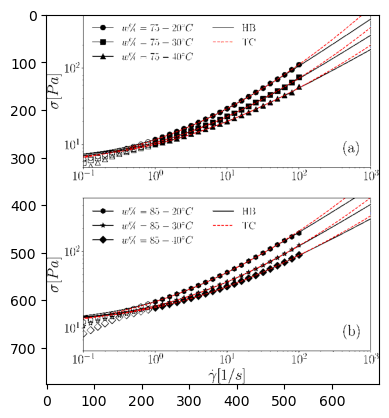

In [54]:
import matplotlib.pyplot as plt
plt.imshow(my_WPD.im)

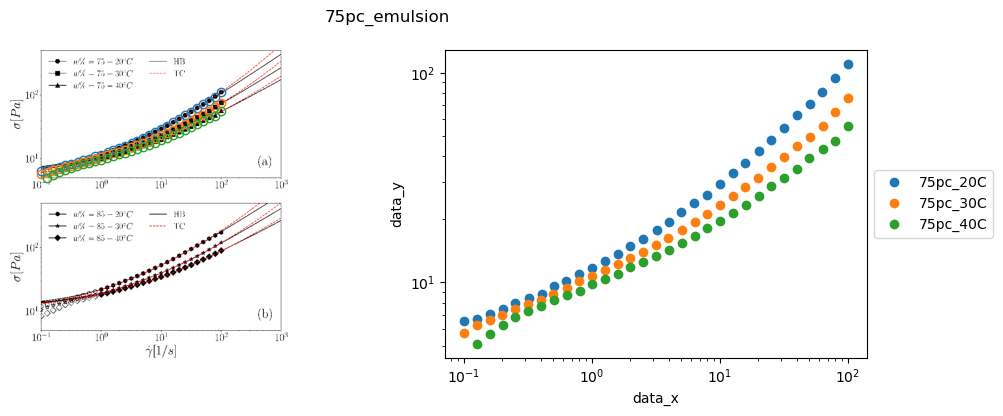

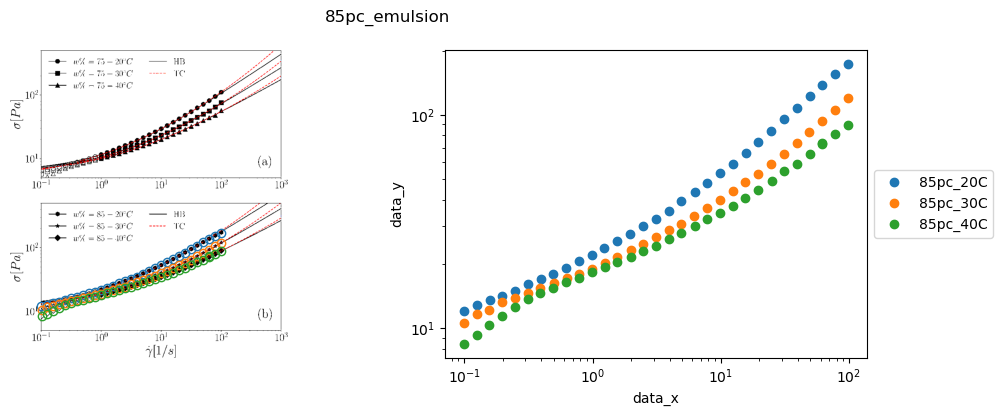

In [55]:
# the describe method iterate through the axes and the datasets in the figure 
# and plot them one by one.
fig_list=my_WPD.describe()

In [56]:
# the to_table method provides a tidy pandas table
data=my_WPD.to_table()
data.head()

,ax_name,dataset_name,data_x,data_y,x,y
0,75pc_emulsion,75pc_20C,100.369093,110.132670,531.529851,106.305970
1,75pc_emulsion,75pc_20C,80.463700,94.634154,517.033582,116.936567
2,75pc_emulsion,75pc_20C,63.562358,81.316680,501.570896,127.567164
3,75pc_emulsion,75pc_20C,50.582466,71.333480,486.591418,136.748134
4,75pc_emulsion,75pc_20C,40.253162,62.575912,471.611940,145.929104


In [57]:
print('axes:',data.ax_name.unique())
print('datasets:',data.dataset_name.unique())

axes: ['75pc_emulsion' '85pc_emulsion']
datasets: ['75pc_20C' '75pc_30C' '75pc_40C' '85pc_20C' '85pc_30C' '85pc_40C']


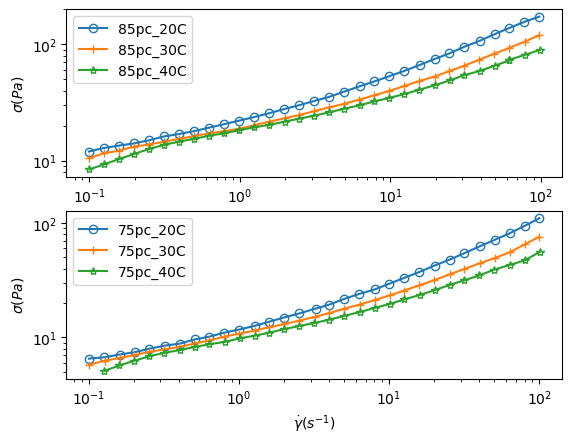

In [58]:
import matplotlib.pyplot as plt
import itertools

marker = itertools.cycle(('o', '+', '*')) 
fig, ax = plt.subplots(2,1)

for index,axes in enumerate(data.ax_name.unique()):
    ax_selection=data['ax_name']==axes
    for dataset in data[ax_selection].dataset_name.unique():
        dataset_selection=data['dataset_name']==dataset
        selection=ax_selection & dataset_selection
        single_dataset=data[selection]
        ax[index-1].plot(single_dataset['data_x'],single_dataset['data_y'], marker=next(marker), mfc='none', label=dataset)

    ax[index-1].set_yscale('log')
    ax[index-1].set_xscale('log')
    ax[index-1].set_xlabel('$\dot\gamma (s^{-1})$')
    ax[index-1].set_ylabel('$\sigma (Pa)$')
    ax[index-1].legend()
